In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
import fitsio
# from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
cat = Table.read('/Users/rongpu/Documents/Data/dr9_tests/outliers/coadd_stats.fits')
print(len(cat))

cat = cat[['BRICKNAME', 'RA', 'DEC', 'npix_obs_g', 'npix_case1_g', 'npix_case2_g', 'npix_case3_g', 'npix_obs_r', 'npix_case1_r', 'npix_case2_r', 'npix_case3_r', 'npix_obs_z', 'npix_case1_z', 'npix_case2_z', 'npix_case3_z']]

243461


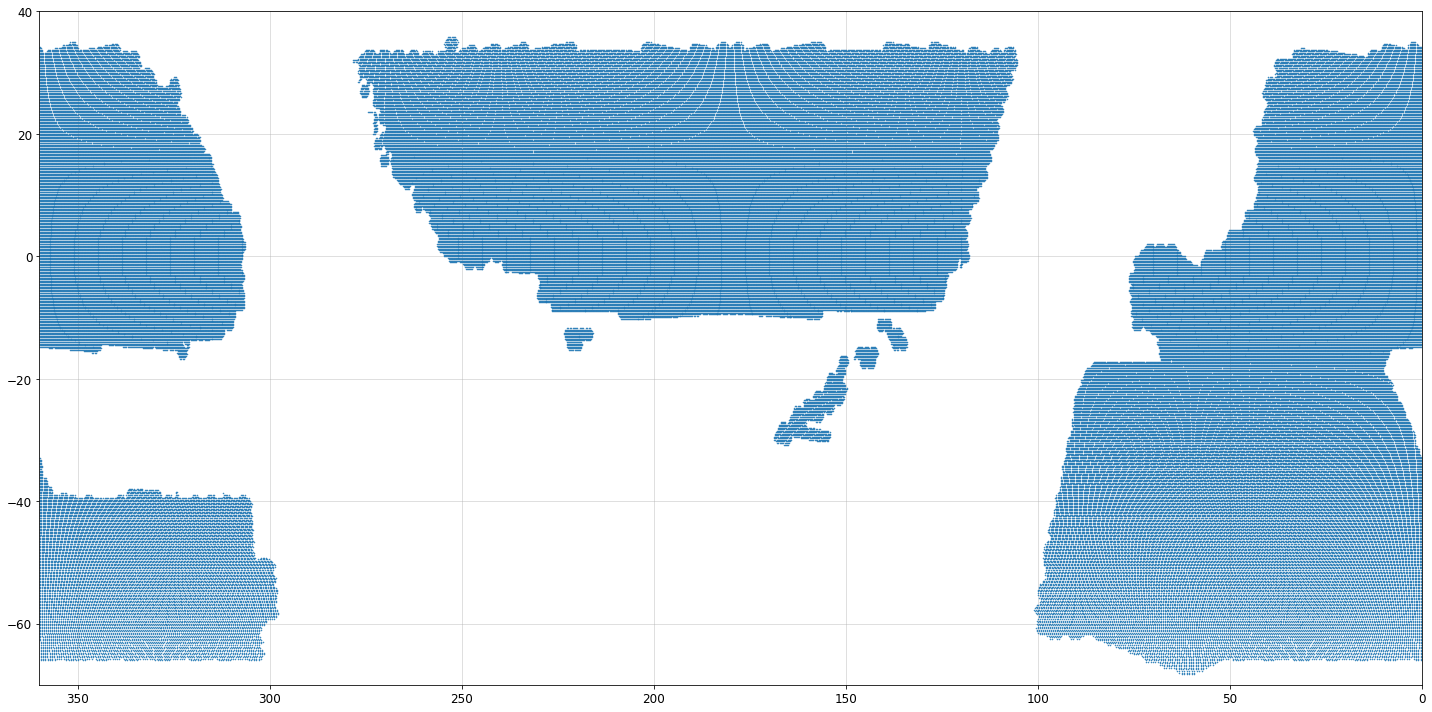

In [4]:
mask = np.ones(len(cat), dtype=bool)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=1, alpha=1)
plt.axis([360, 0, -70, 40])
ax.grid(alpha=0.5)
plt.tight_layout()
# plt.savefig('/Users/rongpu/Downloads/corrupt/r.png')
plt.show()

In [5]:
mask_g = cat['npix_case1_g']>10
mask_g |= (cat['npix_case2_g']>10**2.9)
mask_g |= (cat['npix_case3_g']>1e3)
print(np.sum(mask_g))

mask_r = cat['npix_case1_r']>10
mask_r |= (cat['npix_case2_r']>10**2.4)
mask_r |= (cat['npix_case3_r']>1e3)
print(np.sum(mask_r))

mask_z = cat['npix_case1_z']>10
mask_z |= (cat['npix_case2_z']>10**1)
mask_z |= (cat['npix_case3_z']>1e3)
print(np.sum(mask_z))

277
317
340


784


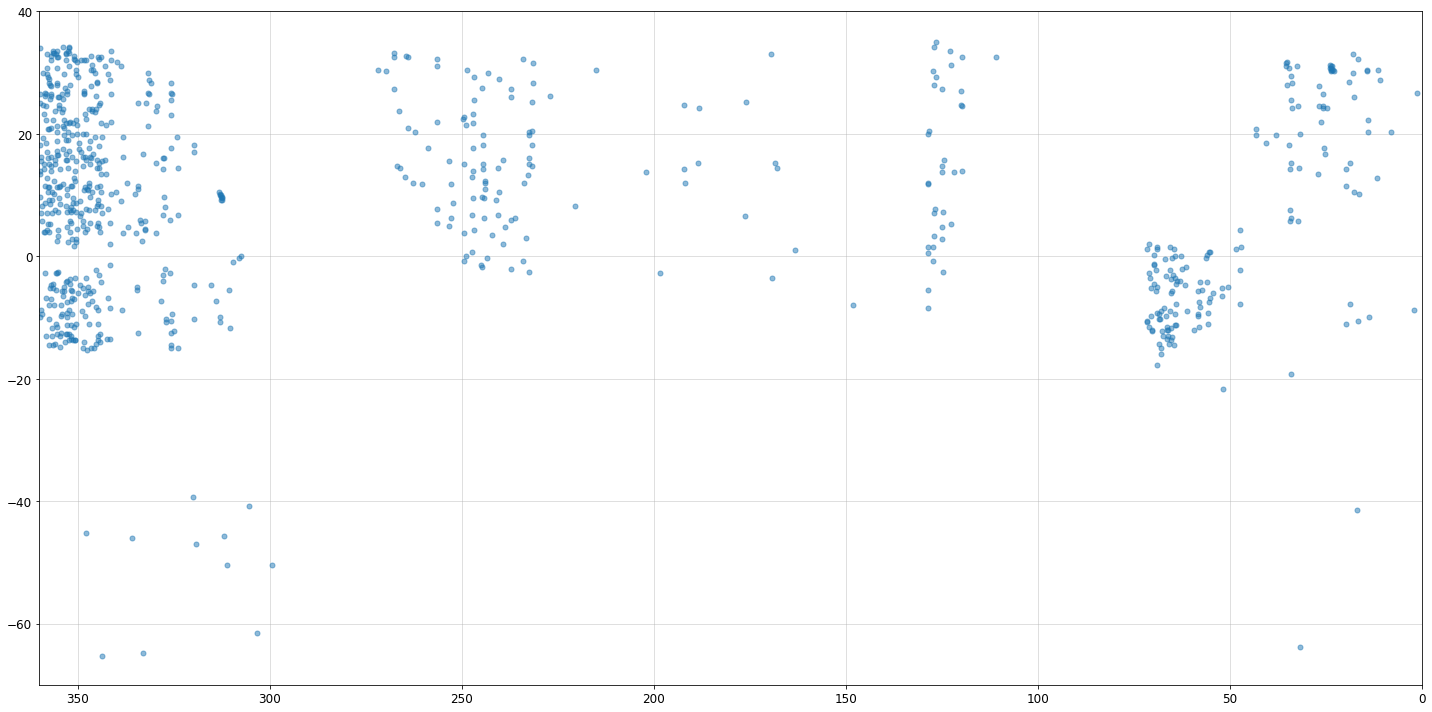

In [6]:
mask = mask_g | mask_r | mask_z
print(np.sum(mask))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=10, alpha=.5)
plt.axis([360, 0, -70, 40])
ax.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('/Users/rongpu/Downloads/corrupt/bad_coadds.png')
plt.show()

--------

In [7]:
cat_all = cat.copy()
cat = cat[mask]
cat.sort('BRICKNAME')

In [8]:
with open("/Users/rongpu/Documents/Data/dr9_tests/outliers/outlier_bricks.txt", "w") as f:
    for index in range(len(cat)):
        f.write(cat['BRICKNAME'][index]+'\n')

In [9]:
with open('/Users/rongpu/Documents/Data/dr9_tests/outliers/bricks-BB-dr9m.txt', 'r') as f:
    bb_list = list(map(str.strip, f.readlines()))
print(len(bb_list))

105010


In [10]:
mask_in_bb = np.in1d(list(cat['BRICKNAME']), bb_list)
print(np.sum(mask_in_bb), len(cat))

tmp = cat[~mask_in_bb]
with open("/Users/rongpu/Documents/Data/dr9_tests/outliers/outlier_bricks_not_in_bb.txt", "w") as f:
    for index in range(len(tmp)):
        f.write(tmp['BRICKNAME'][index]+'\n')

768 784


In [11]:
idx = np.where(~mask_in_bb)[0]
print(len(idx))
if len(idx)>200:
    idx = np.random.choice(idx, size=200, replace=False)
t = Table()
t['RA'] = cat['RA'][idx]
t['DEC'] = cat['DEC'][idx]
t.write('/Users/rongpu/Downloads/visual_inspection.txt', format='ascii.no_header', overwrite=True)

16


In [12]:
cat[~mask_in_bb]

BRICKNAME,RA,DEC,npix_obs_g,npix_case1_g,npix_case2_g,npix_case3_g,npix_obs_r,npix_case1_r,npix_case2_r,npix_case3_r,npix_obs_z,npix_case1_z,npix_case2_z,npix_case3_z
bytes8,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
0168m415,16.80221811460259,-41.5,12946311,0,94,3473,12949129,0,27,0,12945770,0,0,0
2995m505,299.54347826086956,-50.5,12579944,0,7,1,12463669,0,2,0,11106578,0,0,1095
3033m615,303.39130434782606,-61.5,9870412,0,16,0,9798054,0,3,2434,12884842,0,0,0
3055m407,305.53930530164536,-40.75,12549748,0,4,7,12785300,0,3,4585,12877773,1,0,0
3112m505,311.2826086956522,-50.5,12882485,1,106,7,12838504,0,19,2033,12915371,0,0,0
3119m457,311.9642857142857,-45.75,12939161,0,136,0,12922679,0,34,1089,12914240,0,0,0
3124p097,312.46478873239437,9.75,5985553,0,3,0,5753325,0,0,1281,6105003,0,0,0
3125p092,312.53164556962025,9.25,6526758,0,3,0,6326562,0,1,1369,6627675,0,0,0
3125p095,312.53164556962025,9.5,11037284,1,3,0,11129625,0,0,2426,10962939,0,0,0


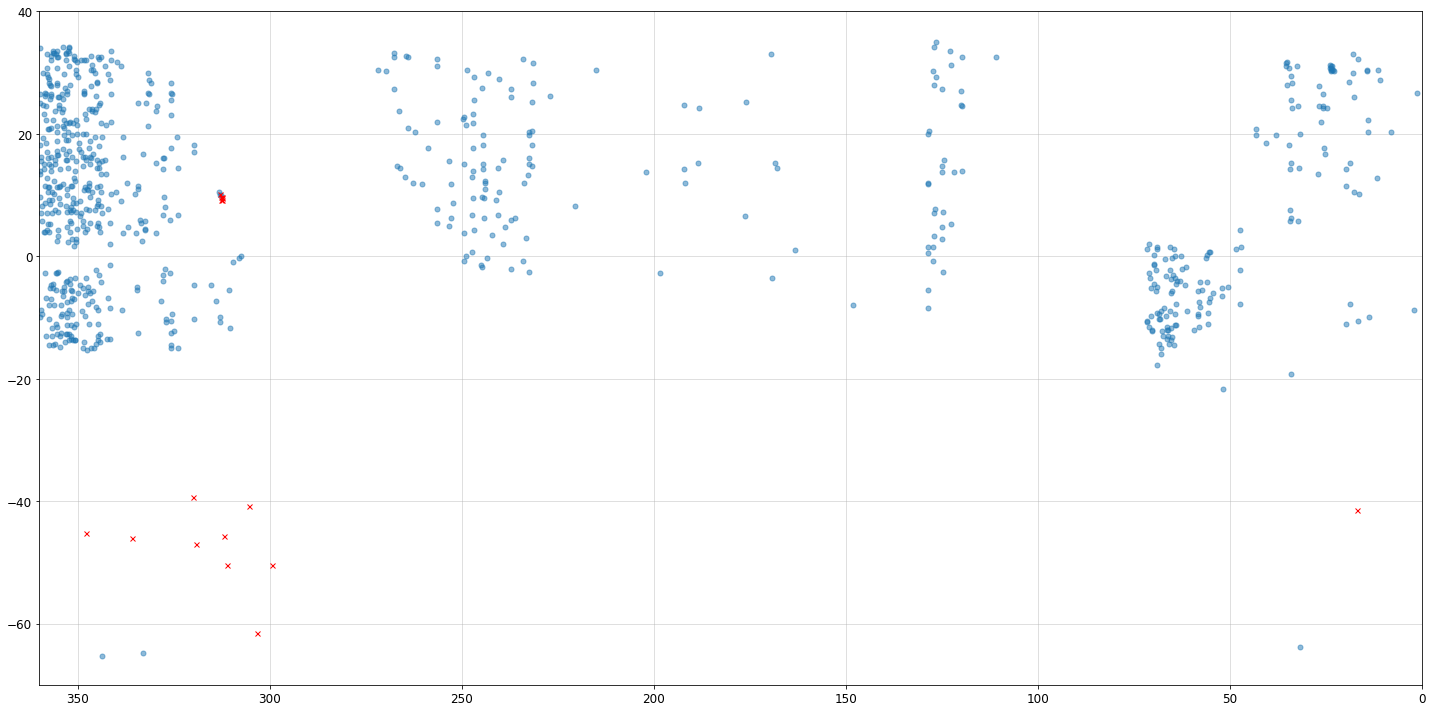

In [14]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cat['RA'][mask_in_bb], cat['DEC'][mask_in_bb], '.', ms=10, alpha=.5)
ax.plot(cat['RA'][~mask_in_bb], cat['DEC'][~mask_in_bb], 'rx', ms=5, alpha=1)
plt.axis([360, 0, -70, 40])
ax.grid(alpha=0.5)
plt.tight_layout()
# plt.savefig('/Users/rongpu/Downloads/corrupt/bad_coadds.png')
plt.show()

In [20]:
ramin, ramax, decmin, decmax = 21.5991, 24.8511, 29.2672, 31.8029
mask = (cat['RA']>ramin) & (cat['RA']<ramax) & (cat['DEC']>decmin) & (cat['DEC']<decmax)
cat[mask]

BRICKNAME,RA,DEC,npix_obs_g,npix_case1_g,npix_case2_g,npix_case3_g,npix_obs_r,npix_case1_r,npix_case2_r,npix_case3_r,npix_obs_z,npix_case1_z,npix_case2_z,npix_case3_z
bytes8,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
0229p302,22.969502407704656,30.25,12821328,0,101,134,12941049,0,6,58,12937390,0,0,1508
0230p305,23.006430868167204,30.5,12555991,1,52,235,12774978,0,1,236,12901735,0,0,1335
0232p305,23.29581993569132,30.5,11047806,0,1,4777,11629852,0,0,1476,12556232,0,0,1476
0234p310,23.446601941747574,31.0,12651990,0,4,2874,12683869,0,1,1801,12743338,0,0,3772
0235p302,23.547351524879616,30.25,12501989,0,18,35,12715353,0,1,12,12636768,0,0,2036
0235p305,23.585209003215436,30.5,7602378,0,0,1982,8819357,0,0,734,11784850,0,0,418
0236p307,23.661290322580644,30.75,8057263,0,1,538,9231646,0,0,103,12134659,0,0,1649
0237p310,23.737864077669904,31.0,11676443,0,6,140,12339230,0,1,83,12853372,1,0,2265
0237p312,23.776337115072934,31.25,12925214,0,37,59,12932374,0,2,9,12922368,0,0,1413


In [21]:
print(np.sum(mask))
print(np.sum(mask & (~mask_in_bb)))

10
0


In [19]:
t = Table()
t['RA'] = cat['RA'][mask]
t['DEC'] = cat['DEC'][mask]
t.write('/Users/rongpu/Downloads/visual_inspection_m33.fits', overwrite=True)

In [25]:
cat1 = cat[mask]

mask_g = cat1['npix_case1_g']>10
print(np.sum(mask_g))
mask_g |= (cat1['npix_case2_g']>10**2.9)
print(np.sum(mask_g))
mask_g |= (cat1['npix_case3_g']>1e3)
print(np.sum(mask_g))
print()

mask_r = cat1['npix_case1_r']>10
print(np.sum(mask_r))
mask_r |= (cat1['npix_case2_r']>10**2.4)
print(np.sum(mask_r))
mask_r |= (cat1['npix_case3_r']>1e3)
print(np.sum(mask_r))
print()

mask_z = cat1['npix_case1_z']>10
print(np.sum(mask_z))
mask_z |= (cat1['npix_case2_z']>10**1)
print(np.sum(mask_z))
mask_z |= (cat1['npix_case3_z']>1e3)
print(np.sum(mask_z))
print()

0
0
3

0
0
2

0
0
9



--------

In [8]:
with open('/Users/rongpu/Downloads/dr9_outlier_bricks.txt', 'r') as f:
    list_of_outlier_bricks = list(map(str.strip, f.readlines()))
print(len(list_of_outlier_bricks))

356


In [9]:
print(len(np.intersect1d(list(cat_all['BRICKNAME']), list_of_outlier_bricks)))
print(len(np.intersect1d(list(cat['BRICKNAME']), list_of_outlier_bricks)))

356
326


In [10]:
dustin_list = ['0138m100', '0556m100', '1664m100', '1666m100', '3129m100', '3451m100', '3527m100', '3542m100', '3598m100']
print(len(dustin_list))

9


In [11]:
print(len(np.intersect1d(list(cat['BRICKNAME']), dustin_list)))
print(len(np.intersect1d(list_of_outlier_bricks, dustin_list)))

4
0


In [12]:
np.intersect1d(list(cat['BRICKNAME']), dustin_list)

array(['0138m100', '3129m100', '3527m100', '3598m100'], dtype='<U8')

In [19]:
np.sort(cat_all['RA'][mask])

13.816901408450704
55.647887323943664
166.43661971830986
166.69014084507043
312.9718309859155
345.16901408450707
352.77464788732397
354.2957746478873
359.8732394366197


9


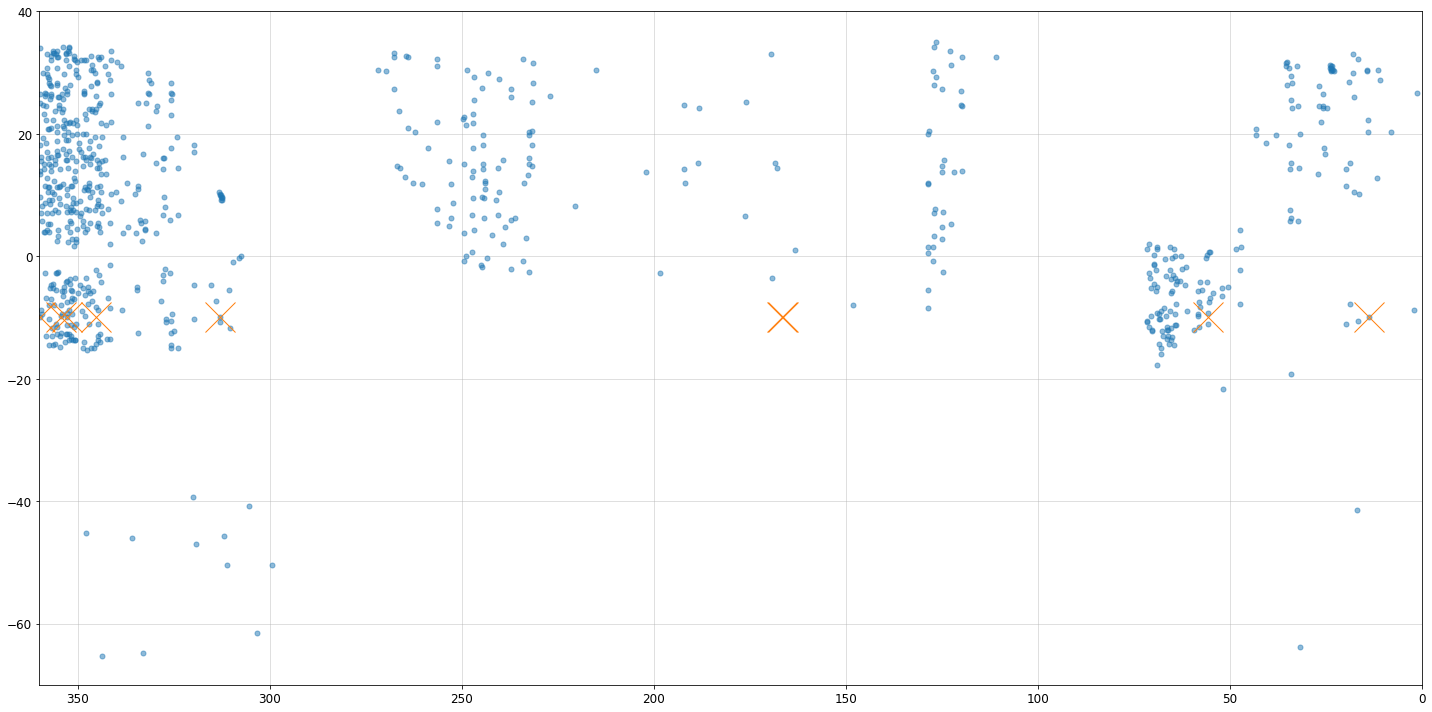

In [20]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cat['RA'], cat['DEC'], '.', ms=10, alpha=.5)

mask = np.in1d(list(cat_all['BRICKNAME']), dustin_list)
print(np.sum(mask))
ax.plot(cat_all['RA'][mask], cat_all['DEC'][mask], 'x', ms=30, alpha=1)


plt.axis([360, 0, -70, 40])
ax.grid(alpha=0.5)
plt.tight_layout()
# plt.savefig('/Users/rongpu/Downloads/corrupt/r.png')
plt.show()

9


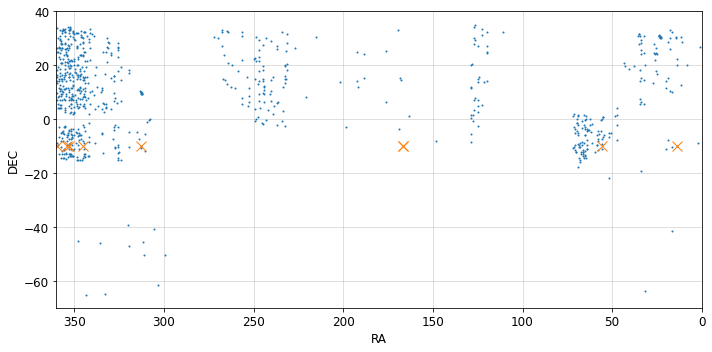

In [48]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cat['RA'], cat['DEC'], '.', ms=2, alpha=1)

mask = np.in1d(list(cat_all['BRICKNAME']), dustin_list)
print(np.sum(mask))
ax.plot(cat_all['RA'][mask], cat_all['DEC'][mask], 'x', ms=10, alpha=1)
plt.xlabel('RA')
plt.ylabel('DEC')

plt.axis([360, 0, -70, 40])
ax.grid(alpha=0.5)
plt.tight_layout()
# plt.savefig('/Users/rongpu/Downloads/corrupt/r.png')
plt.show()

-------

In [20]:
# Bad bricks not found from the coadds
mask = np.in1d(list(cat_all['BRICKNAME']), list_of_outlier_bricks)
mask &= ~np.in1d(list(cat_all['BRICKNAME']), list(cat['BRICKNAME']))
cat_all[mask]

BRICKNAME,RA,DEC,npix_obs_g,npix_case1_g,npix_case2_g,npix_case3_g,npix_obs_r,npix_case1_r,npix_case2_r,npix_case3_r,npix_obs_z,npix_case1_z,npix_case2_z,npix_case3_z
bytes8,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
1336p060,133.68200836820083,6.0,11512593,0,12,0,12062462,0,1,0,12114404,0,0,0
3534m137,353.4428571428571,-13.75,12957867,1,22,1,12957139,0,1,0,12955125,0,0,0
3362p312,336.2236628849271,31.25,12924859,0,44,0,12905673,0,2,0,12404805,0,0,0
0573m015,57.375,-1.5,10910575,0,699,0,11018670,0,1,3,10679032,0,0,0
1520p122,152.0028409090909,12.25,10650125,0,0,0,11645900,0,1,0,12920536,0,0,0
3185p047,318.50974930362116,4.75,12916388,0,50,0,12918639,0,6,0,12916228,0,0,0
2722p280,272.2605965463108,28.0,12898069,0,100,0,12898699,1,5,0,12859737,0,0,0
0696m620,69.61764705882354,-62.0,12959461,0,93,0,12952985,1,20,0,12135579,0,0,0
1286m010,128.625,-1.0,12933080,0,19,5,12932367,0,1,3,12927895,0,0,0


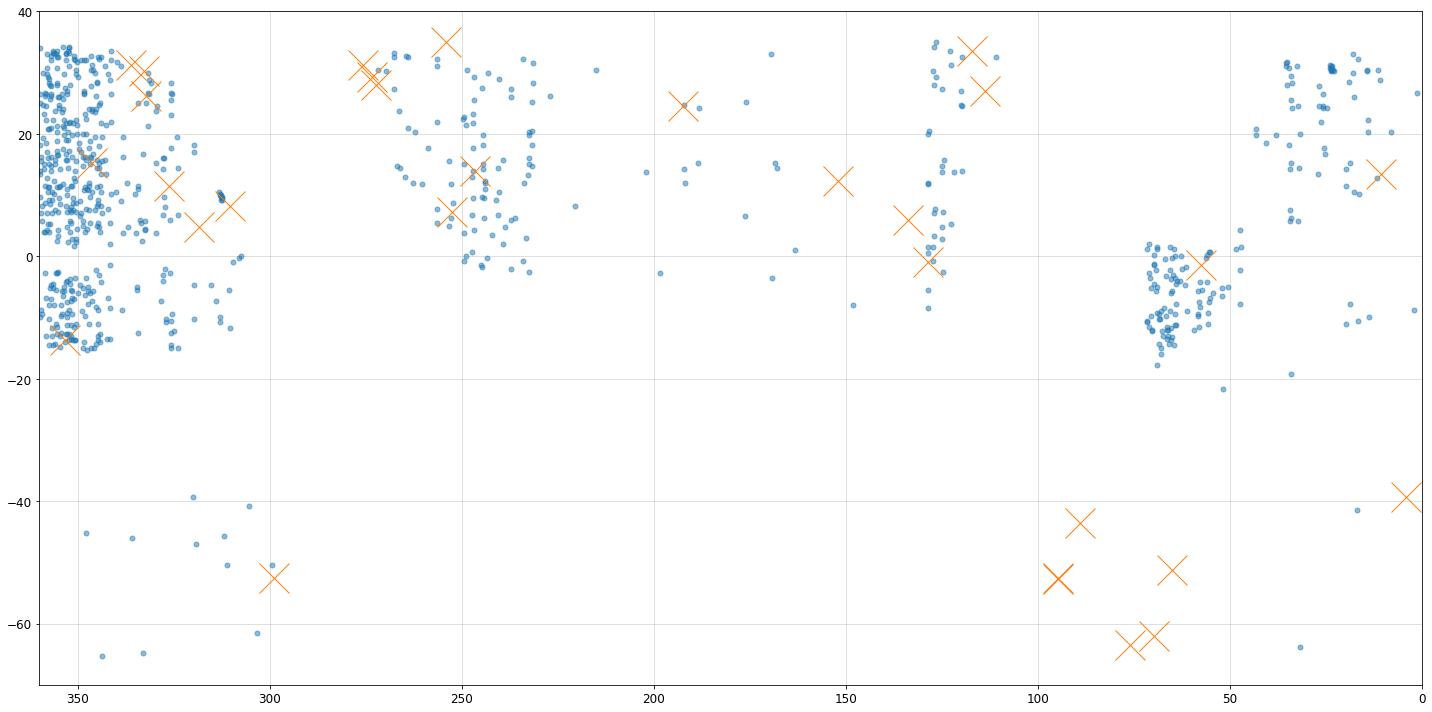

In [21]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cat['RA'], cat['DEC'], '.', ms=10, alpha=.5)

ax.plot(cat_all['RA'][mask], cat_all['DEC'][mask], 'x', ms=30, alpha=1)


plt.axis([360, 0, -70, 40])
ax.grid(alpha=0.5)
plt.tight_layout()
# plt.savefig('/Users/rongpu/Downloads/corrupt/r.png')
plt.show()

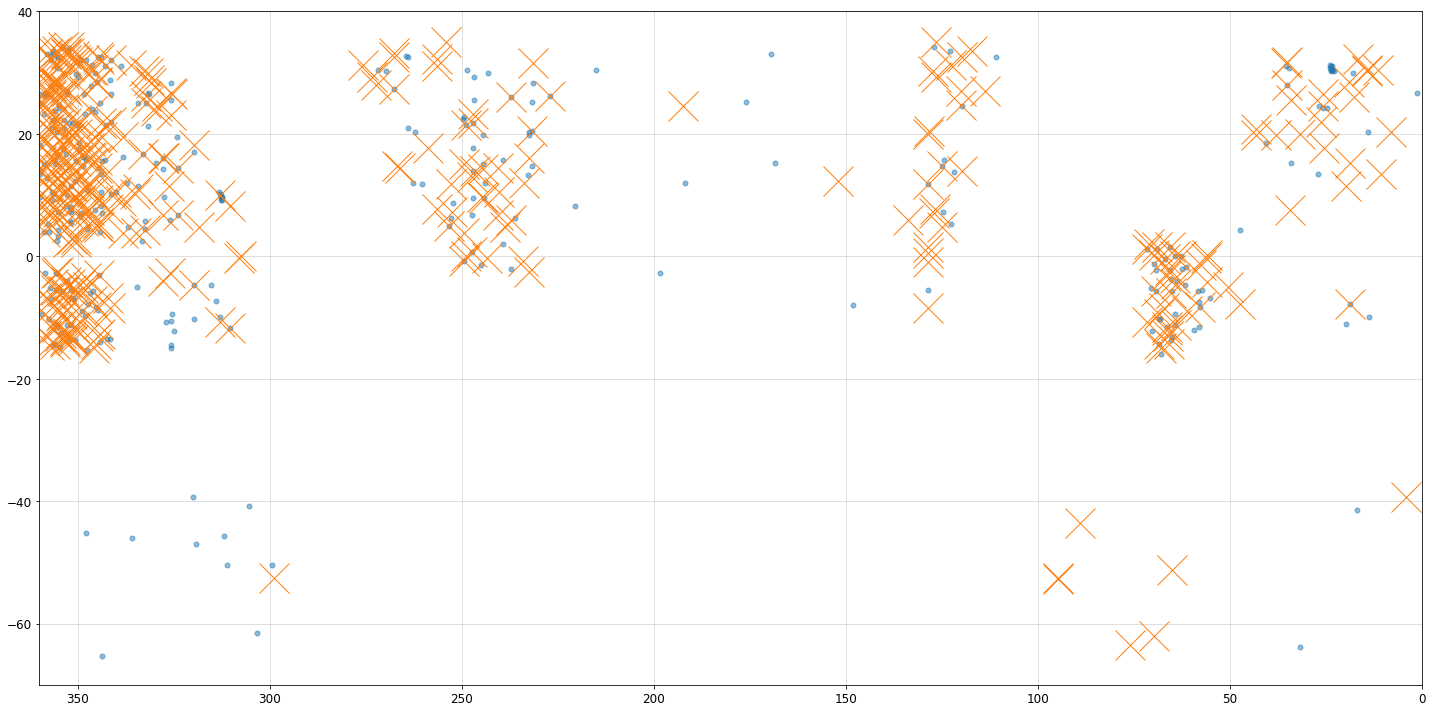

In [39]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cat['RA'], cat['DEC'], '.', ms=10, alpha=.5)

ax.plot(cat_all['RA'][mask], cat_all['DEC'][mask], 'x', ms=30, alpha=1)


plt.axis([360, 0, -70, 40])
ax.grid(alpha=0.5)
plt.tight_layout()
# plt.savefig('/Users/rongpu/Downloads/corrupt/r.png')
plt.show()

62066


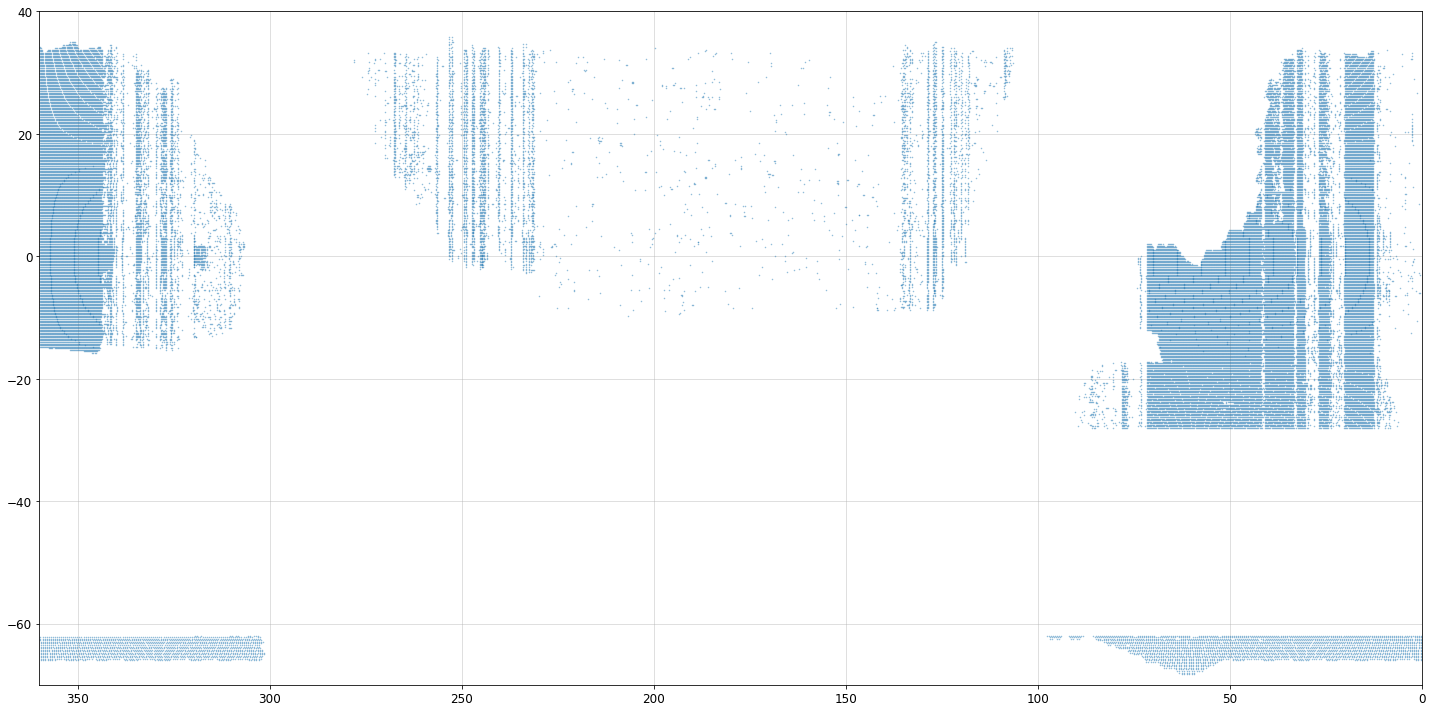

In [28]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
mask = np.in1d(list(cat_all['BRICKNAME']), bb_list)
print(np.sum(mask))
ax.plot(cat_all['RA'][mask], cat_all['DEC'][mask], '.', ms=1, alpha=.5)
plt.axis([360, 0, -70, 40])
ax.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('/Users/rongpu/Downloads/corrupt/bb_list.png')
plt.show()

In [42]:
print(len(np.intersect1d(list(cat['BRICKNAME']), bb_list)), len(cat))

741 784
